In [9]:
import pylab as pl
import numpy as np
from scipy import signal

In [10]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

### 信号处理-signal

### 中值滤波

True


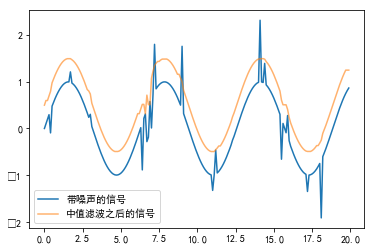

In [11]:
#%fig=使用中值滤波剔除瞬间噪声
t = np.arange(0, 20, 0.1)
x = np.sin(t)
x[np.random.randint(0, len(t), 20)] += np.random.standard_normal(20)*0.6 #❶
x2 = signal.medfilt(x, 5) #❷
x3 = signal.order_filter(x, np.ones(5), 2)
print (np.all(x2 == x3))
pl.plot(t, x, label=u"带噪声的信号")
pl.plot(t, x2 + 0.5, alpha=0.6, label=u"中值滤波之后的信号")
pl.legend(loc="best");

### 滤波器设计

In [12]:
sampling_rate = 8000.0

# 设计一个带通滤波器：
# 通带为0.2*4000 - 0.5*4000
# 阻带为<0.1*4000, >0.6*4000
# 通带增益的最大衰减值为2dB
# 阻带的最小衰减值为40dB
b, a = signal.iirdesign([0.2, 0.5], [0.1, 0.6], 2, 40) #❶

# 使用freq计算滤波器的频率响应
w, h = signal.freqz(b, a) #❷

# 计算增益
power = 20*np.log10(np.clip(np.abs(h), 1e-8, 1e100)) #❸
freq = w / np.pi * sampling_rate / 2

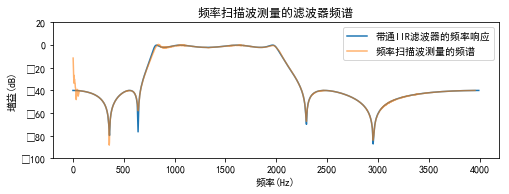

In [13]:
#%fig=用频率扫描波测量的频率响应
# 产生2秒钟的取样频率为sampling_rate Hz的频率扫描信号
# 开始频率为0， 结束频率为sampling_rate/2
t = np.arange(0, 2, 1/sampling_rate) #❶
sweep = signal.chirp(t, f0=0, t1=2, f1=sampling_rate/2) #❷
# 对频率扫描信号进行滤波
out = signal.lfilter(b, a, sweep) #❸
# 将波形转换为能量
out = 20*np.log10(np.abs(out)) #❹
# 找到所有局部最大值的下标
index = signal.argrelmax(out, order=3)  #❺
# 绘制滤波之后的波形的增益
pl.figure(figsize=(8, 2.5))
pl.plot(freq, power, label=u"带通IIR滤波器的频率响应") 
pl.plot(t[index]/2.0*4000, out[index], label=u"频率扫描波测量的频谱", alpha=0.6) #❻
pl.legend(loc="best")
#%hide
pl.title(u"频率扫描波测量的滤波器频谱")
pl.ylim(-100,20)
pl.ylabel(u"增益(dB)")
pl.xlabel(u"频率(Hz)");

### 连续时间线性系统

Text(0,0.5,'位移（米）')

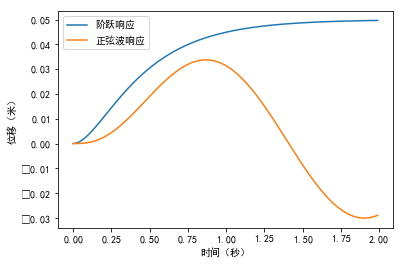

In [14]:
#%fig=系统的阶跃响应和正弦波响应
m, b, k = 1.0, 10, 20

numerator = [1]
denominator = [m, b, k]

plant = signal.lti(numerator, denominator)  #❶

t = np.arange(0, 2, 0.01)
_, x_step = plant.step(T=t)  #❷
_, x_sin, _ = signal.lsim(plant, U=np.sin(np.pi * t), T=t)  #❸
#%hide
pl.plot(t, x_step, label=u"阶跃响应")
pl.plot(t, x_sin, label=u"正弦波响应")
pl.legend(loc="best")
pl.xlabel(u"时间（秒）")
pl.ylabel(u"位移（米）")